In [1]:
## 1. Import Libraries & Load Dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression(max_iter=200)

In [3]:
## 2. K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores_kf = cross_val_score(model, X_scaled, y, cv=kf)

scores_kf

array([1.        , 0.96666667, 0.93333333, 0.93333333, 0.96666667])

In [4]:
## 3. Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_skf = cross_val_score(model, X_scaled, y, cv=skf)

scores_skf

array([1.        , 0.96666667, 0.9       , 1.        , 0.9       ])

In [5]:
## 4. Compare CV Methods
results = pd.DataFrame({
    "KFold": scores_kf,
    "StratifiedKFold": scores_skf
})
results

,KFold,StratifiedKFold
0,1.000000,1.000000
1,0.966667,0.966667
2,0.933333,0.900000
3,0.933333,1.000000
4,0.966667,0.900000


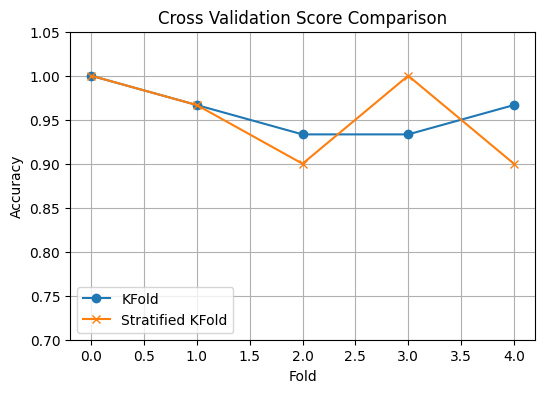

In [6]:
## 5. Visualize CV Score Distribution
plt.figure(figsize=(6,4))
plt.plot(scores_kf, marker='o', label='KFold')
plt.plot(scores_skf, marker='x', label='Stratified KFold')
plt.ylim(0.7, 1.05)
plt.title("Cross Validation Score Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Fold")
plt.legend()
plt.grid(True)
plt.show()